# Evaluation of IC and MPC


Evaluation of data acquired from control cascade in simulator PyBullet

        if ref_type == "spiral":
            REFERENCE = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.0, 1.0], tscale = 0.6)
        else:
            REFERENCE = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.5, 1.0], tscale = 0.6)


## Imports and Loading Data


In [199]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import tikzplotlib as tplt
from uav_params import UAVParams


In [200]:
# load model data
save_plots = True
noise = False
model_data_folder = "params"
models_file = ["lateral_crazyflie", "lateral_crazyflie", "altitude_crazyflie"]
plot_label_font = 10
plot_legend_font = 10

# Load parameters of dynamics and cost function
models = []
for model_file in models_file:
    with open(model_data_folder+"/"+"ctrl_"+model_file+".pkl", 'rb') as infile:
        models.append(pickle.load(infile))

with open(model_data_folder+"/"+"ctrl_"+"attitude_crazyflie"+".pkl", 'rb') as infile:
    model_att = pickle.load(infile)
pass

# Load data from results folder
folder_results = 'results/3d_pybullet_faster/'
folder_data = 'data/'
trajectories = ['spiral', 'figure8']
controllers = ['ic','eic','mpcmb']
data = {}
dt_data = {}
for trajectory in trajectories:
    for controller in controllers:
        # data = [state, ref, ctrl, cost, time]
        path = folder_results+folder_data+'log_controller_'+trajectory+'_'+controller
        if noise:
            path = folder_results+folder_data+'log_controller_'+trajectory+'_noise_'+controller
        data.setdefault(trajectory, {})[controller] = np.load(
            path+'.npy', allow_pickle=True)
        path_dt = folder_results+folder_data+'time_'+trajectory+'_'+controller
        if noise:
            path_dt = folder_results+folder_data+'time'+trajectory+'_'+controller+'_noise'
        dt_data.setdefault(trajectory, {})[controller] = np.load(
            path_dt+'.npy', allow_pickle=True)

# Set time vector
Nsim = data[trajectories[0]][controllers[0]][0].shape[2]
time = np.arange(0, models[0].dt*Nsim, models[0].dt)
colors_full = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500),(0.49400,0.18400,0.55600),(0.133333333,0.545098039,0.133333333)] # IC, eIC, MPC, MPCMB
colors = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500),(0.133333333,0.545098039,0.133333333)] # IC, eIC, MPC, MPCMB
ref_color = (0.121568627451,0.466666666667,0.705882352941)
colors_time = [(0.133333333,0.545098039,0.133333333),(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500)] # different order # MPC, MPCMB, IC, eIC

## Distribution of Invariant Sets

Picture of set given by state constraints, invariant set of low gain controller, and high gain controller.

Order: y and z-axis controller


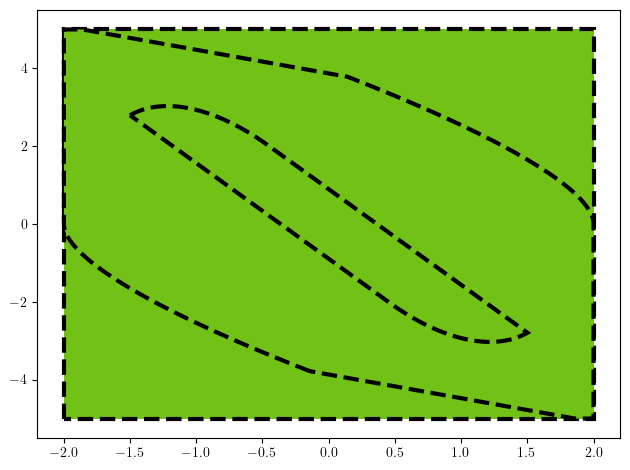

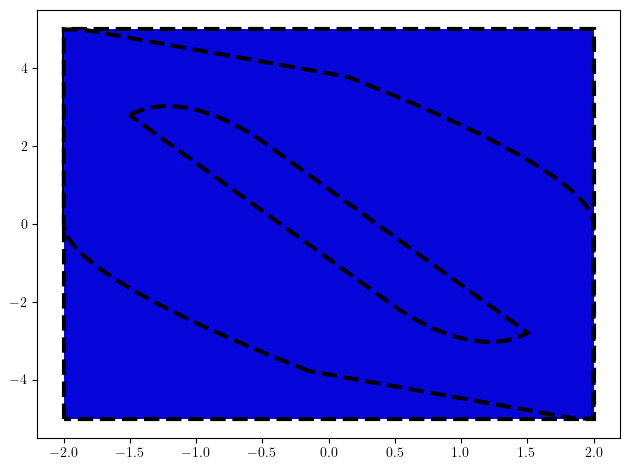

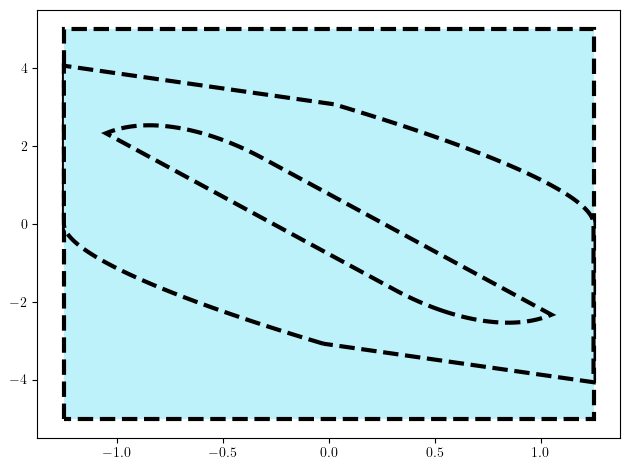

In [201]:
for model in models:
    model.plot_sets()

## Plots

### plot with reference and UAV position for spiral/ellipse and figure8 reference trajectory

In [202]:
def save_plot(path, noise = False):
    tplt.clean_figure()
    tplt.save(path+'.tex')
    if noise:
        path = path+'_noise'
    plt.legend(fontsize=plot_legend_font)
    plt.savefig(path+'.pdf',bbox_inches="tight")
    plt.show()
    # plt.savefig(path+'.tex',format="pgf")

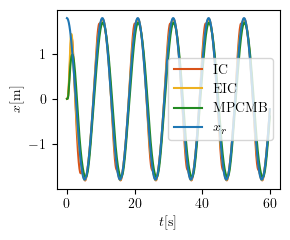

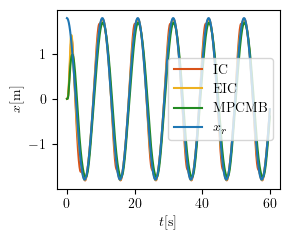

In [203]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,0, :], label=controller.upper(), color = colors[i])
    plt.plot(time, data[trajectory][controllers[0]][1][0, :], label=r'$x_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$x\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/x_'+trajectory)
    else:
        plt.legend()
        plt.show()

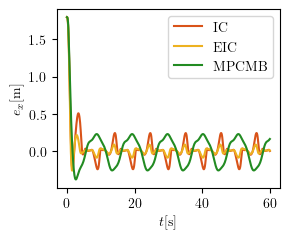

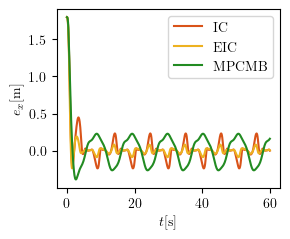

In [204]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][0, :]-data[trajectory][controller][0][0,0, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$e_x\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/e_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

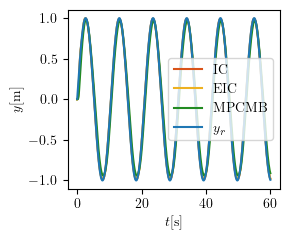

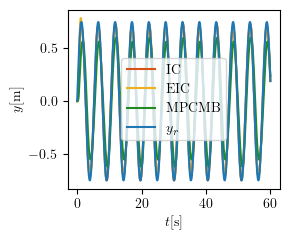

In [205]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,1, :], label=controller.upper(), color = colors[i])
    plt.plot(time, data[trajectory][controllers[0]][1][1, :], label=r'$y_r$', color=ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/y_'+trajectory)
    else:
        plt.legend()
        plt.show()

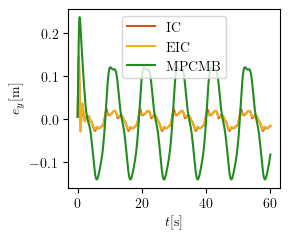

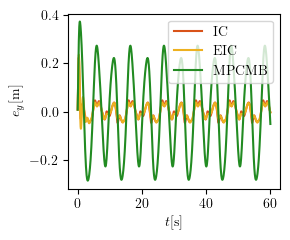

In [206]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][1, :]-data[trajectory][controller][0][0,1, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$e_y\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/e_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

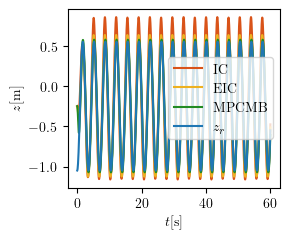

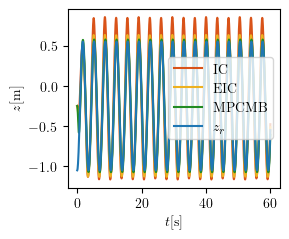

In [207]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,2, :], label=controller.upper(), color = colors[i])
    plt.plot(time, data[trajectory][controllers[0]][1][2, :], label=r'$z_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$z\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/z_'+trajectory)
    else:
        plt.legend()
        plt.show()

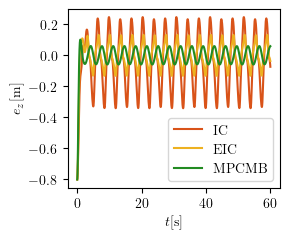

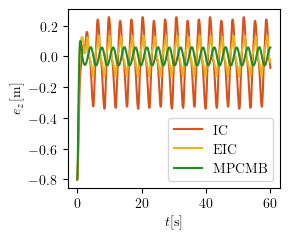

In [208]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][2, :]-data[trajectory][controller][0][0,2, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$e_z\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/e_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### plot with UAV velocity for spiral/ellipse and figure8 reference trajectory

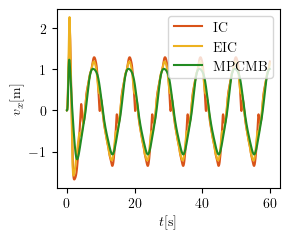

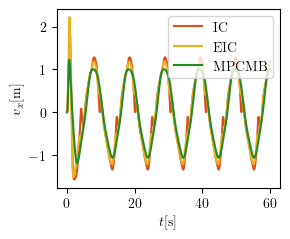

In [209]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,6, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$v_x\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/vx_'+trajectory)
    else:
        plt.legend()
        plt.show()

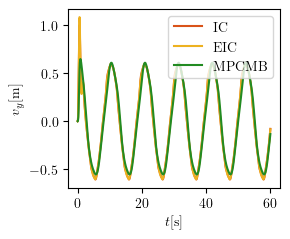

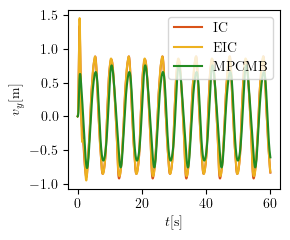

In [210]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,7, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$v_y\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/vy_'+trajectory)
    else:
        plt.legend()
        plt.show()

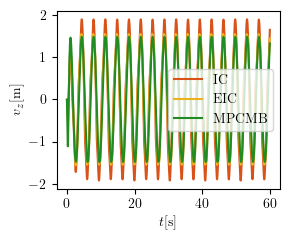

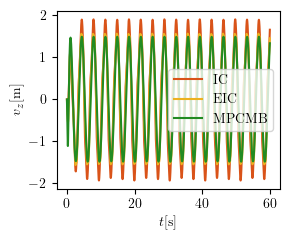

In [211]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,8, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$v_z\mathrm{[m]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/vz_'+trajectory)
    else:
        plt.legend()
        plt.show()

### path of UAV for spiral/ellipse and figure8 reference trajectory

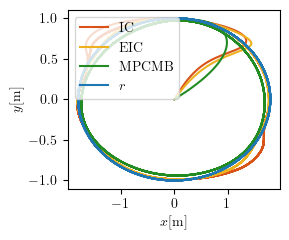

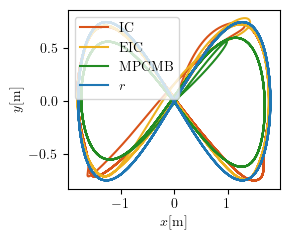

In [212]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(data[trajectory][controller][0][0, 0, :],
             data[trajectory][controller][0][0, 1, :], label=controller.upper(), color = colors[i])
    plt.plot(data[trajectory][controllers[0]][1][0, :],
             data[trajectory][controllers[0]][1][1, :], label='$r$', color = ref_color)
    plt.xlabel(r'$x\mathrm{[m]}$', fontsize=10)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=10)
    if save_plots:
        tplt.clean_figure()
        tplt.save(folder_results+'plots/traj_xy_'+trajectory+'.tex')
        if noise:
            path = folder_results+'plots/traj_xy_'+trajectory+'_noise'
        plt.legend(loc='upper left', fontsize=plot_legend_font)
        plt.savefig(folder_results+'plots/traj_xy_'+trajectory+'.pdf',bbox_inches="tight")
        plt.show()
        # save_plot(folder_results+'plots/traj_xy_'+trajectory)
    else:
        plt.legend()
        plt.show()


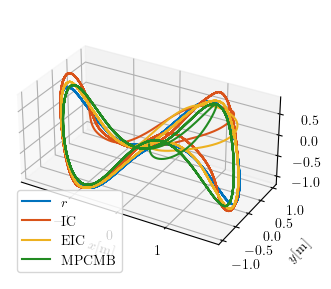

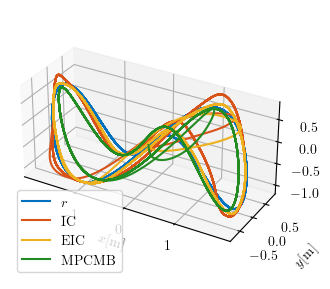

In [213]:
color_ref = (0.00000,0.44700,0.74100)
for trajectory in trajectories:
    colors = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500), (0.133333333,0.545098039,0.133333333)]
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.set_box_aspect((np.ptp(data[trajectory][controllers[0]][1][0, :]), np.ptp(data[trajectory][controllers[0]][1][1, :]), np.ptp(data[trajectory][controllers[0]][1][2, :])))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    # plt.figure(figsize=(3,2.5))
    fig.set_figwidth(4.5)
    fig.set_figheight(3)
    ax.plot3D(data[trajectory][controllers[0]][1][0, :],
             data[trajectory][controllers[0]][1][1, :],data[trajectory][controllers[0]][1][2, :], label='$r$', color = color_ref)
    for controller, color in zip(controllers,colors):
        ax.plot3D(data[trajectory][controller][0][0, 0, :],
             data[trajectory][controller][0][0, 1, :], data[trajectory][controller][0][0, 2, :],label=controller.upper(), color = color)
    ax.set_xlabel(r'$x\mathrm{[m]}$', fontsize=10)
    ax.set_ylabel(r'$y\mathrm{[m]}$', fontsize=10)
    ax.set_zlabel(r'$z\mathrm{[m]}$', fontsize=10)
    ax.zaxis._axinfo['label']['space_factor'] = 2.8
    plt.rcParams["figure.autolayout"] = True
    plt.legend()
    # fig.subplots_adjust(left=0, bottom=0, right=0.3, top=0.5, wspace=0, hspace=0)
    # ax.set_box_aspect(aspect=None, zoom=0.7)
    plt.tight_layout()
    if save_plots:
        fig.savefig(folder_results+'plots/traj_xyz_'+trajectory+'.pdf')
        plt.show()
    else:
        plt.legend()
        plt.show()

### Ouput of controllers

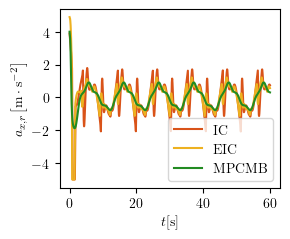

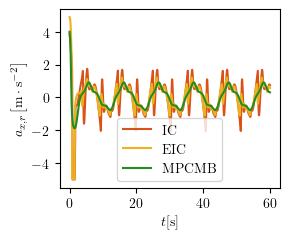

In [214]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][2][0, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$a_{x,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/acc_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

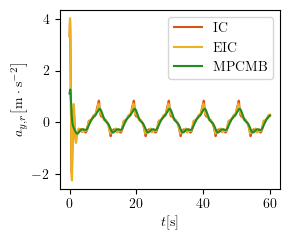

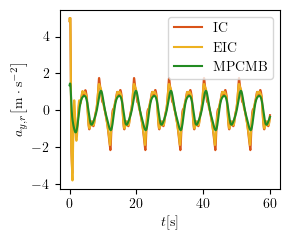

In [215]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][2][1, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$a_{y,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/acc_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Ouput of z-controllers in form of desired collective thrust

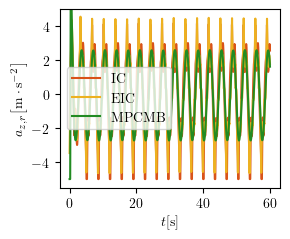

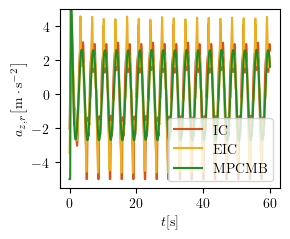

In [216]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][2][2, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
    plt.ylabel(r'$a_{z,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=10)
    plt.ylim(top=5)
    if save_plots:
        save_plot(folder_results+'plots/acc_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed to solve LP/QP

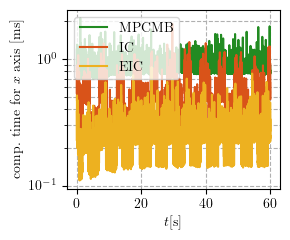

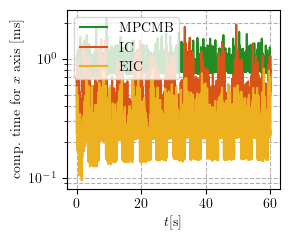

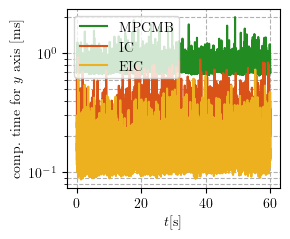

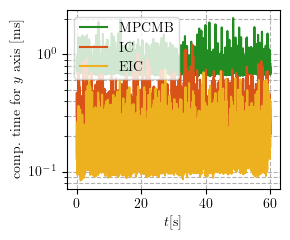

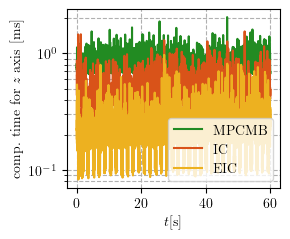

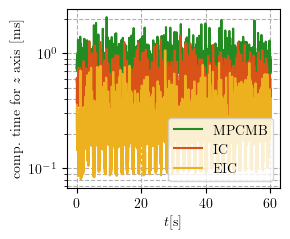

In [217]:
controllers_time = ['mpcmb','ic','eic'] # to draw in correct order because of overlapping
names = ['x','y','z']
for i, name in enumerate(names):
    for trajectory in trajectories:
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(3,2.5))
        for controller, color in zip(controllers_time,colors_time):
            plt.plot(time, data[trajectory][controller][4][i,:]*1e3, label=controller.upper(), color = color)
        plt.yscale('log')
        plt.grid(True, which="both", linestyle='--')
        plt.xlabel(r'$t\mathrm{[s]}$', fontsize=10)
        plt.ylabel(r'comp. time for $'+name+'$ axis $\mathrm{[ms]}$', fontsize=10)
        if save_plots:
            save_plot(folder_results+'plots/time_'+name+'_'+trajectory)
        else:
            plt.legend()
            plt.show()

#### Sum of both periods

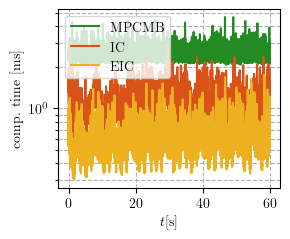

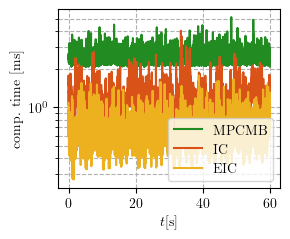

In [218]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors_time):
        plt.plot(time, np.sum(data[trajectory][controller][4][:,:], 0)*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=10)
    plt.ylabel(r'comp. time [ms]', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/time_sum_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed for control cascade to acquire control action

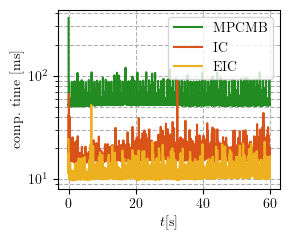

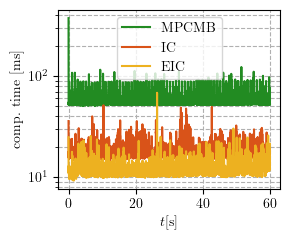

In [219]:
controllers_time = ['mpcmb','ic','eic'] # to draw in correct order because of overlapping

names = ['y','z']
for trajectory in trajectories:
    colors = [(0.133333333,0.545098039,0.133333333),(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500)]
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors):
        plt.plot(time, dt_data[trajectory][controller]*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=10)
    plt.ylabel(r'comp. time [ms]', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/time_full_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Interpolating coefficient

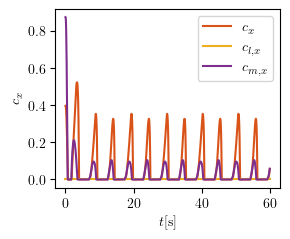

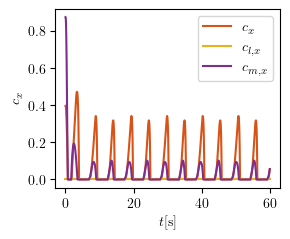

In [220]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[0]][3][0, :], label=r'$c_x$', color = colors_full[0])
    plt.plot(time, data[trajectory][controllers[1]][3][0, 0, :], label=r'$c_{l,x}$', color = colors_full[1])
    plt.plot(time, data[trajectory][controllers[1]][3][1, 0, :], label=r'$c_{m,x}$', color = colors_full[2])
    plt.xlabel(r'$t$[s]', fontsize=10)
    plt.ylabel(r'$c_x$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/c_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

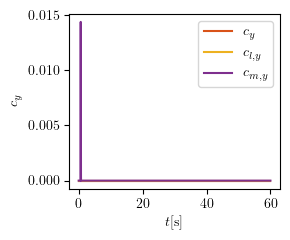

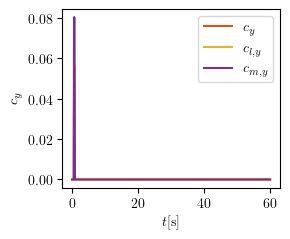

In [221]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[0]][3][1, :], label=r'$c_y$', color = colors_full[0])
    plt.plot(time, data[trajectory][controllers[1]][3][0, 1, :], label=r'$c_{l,y}$', color = colors_full[1])
    plt.plot(time, data[trajectory][controllers[1]][3][1, 1, :], label=r'$c_{m,y}$', color = colors_full[2])
    plt.xlabel(r'$t$[s]', fontsize=10)
    plt.ylabel(r'$c_y$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/c_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

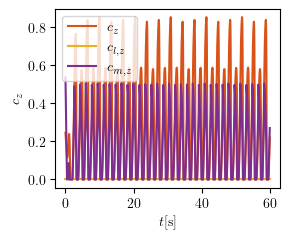

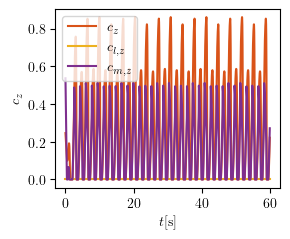

In [222]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[0]][3][2, :], label=r'$c_z$', color = colors_full[0])
    plt.plot(time, data[trajectory][controllers[1]][3][0, 2, :], label=r'$c_{l,z}$', color = colors_full[1])
    plt.plot(time, data[trajectory][controllers[1]][3][1, 2, :], label=r'$c_{m,z}$', color = colors_full[2])
    plt.xlabel(r'$t$[s]', fontsize=10)
    plt.ylabel(r'$c_z$', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/c_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Value of criterion from MPCs

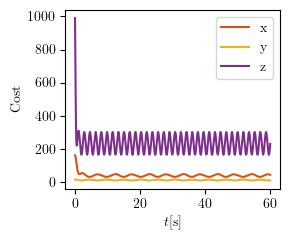

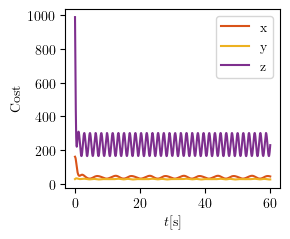

In [223]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[2]]
             [3][0, :], label=r'x', color = colors_full[0])
    plt.plot(time, data[trajectory][controllers[2]]
             [3][1, :], label=r'y', color = colors_full[1])
    plt.plot(time, data[trajectory][controllers[2]]
             [3][2, :], label=r'z', color = colors_full[2])
    plt.xlabel(r'$t$[s]', fontsize=10)
    plt.ylabel(r'Cost', fontsize=10)
    if save_plots:
        save_plot(folder_results+'plots/mpc_cost_'+trajectory)
    else:
        plt.legend()
        plt.show()

# Optimality, Integral Square Error, and Energy Consumption

In [224]:
nx = data[trajectory][controller][0].shape[1]
Q = np.zeros((nx,nx))
for i, model in enumerate(models):
    Q[i,i] = model.Q_h[0,0]
    Q[i+nx//2,i+nx//2] = model.Q_h[1,1]
    
nu = data[trajectory][controller][2].shape[0]
R = np.zeros((nu,nu))
for i, model in enumerate(models):
    R[i,i] = model.R_h

def eval_crit(state, control, Q, R):
    return state@Q@state.T + control@R@control.T

def signif(x, p):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

def perc(x,l):
    return (x/l)*100-100

n = 3
nperc = 2
def eval_table(dict):
    df = pd.DataFrame.from_dict(dict)
    for trajectory in trajectories:
        df[trajectory] = df[trajectory].apply(lambda x: signif(x, n))
        df[trajectory + ' perc.'] = df[trajectory].apply(lambda x: perc(x,df.loc['mpcmb'].at[trajectory]))
        df[trajectory + ' perc.'] = df[trajectory + ' perc.'].apply(lambda x: np.round(x, nperc))
    return df


def multipar_dict_to_df(nested_dict):
    reformed_dict = {}
    for outerKey, innerDict in nested_dict.items():
        for innerKey, values in innerDict.items():
            reformed_dict[(outerKey,
                        innerKey)] = values
        return pd.DataFrame(reformed_dict)

err = {}
ise = {}
total_ise = {}
total_energy = {}
energy_cons = {}
total_time = {}
max_time = {}
mean_time = {}
std_time = {}
crit = {}
for trajectory in trajectories:
    for controller in controllers:
        err_temp = []
        crit_temp = []
        for i, model in enumerate(models):
            err_temp.append(data[trajectory][controller][1][i,:] - data[trajectory][controller][0][0,i,:])
        err.setdefault(trajectory, {})[controller] = np.array(err_temp)
        ise_temp = model.dt*np.sum((err[trajectory][controller][:,:]**2), 1)
        ise.setdefault(trajectory, {})[controller] =  np.hstack((ise_temp, np.sum(ise_temp)))
        energy_temp = model.dt*np.sum((data[trajectory][controller][2][:,:]**2), 1)
        energy_cons.setdefault(trajectory, {})[controller] = np.hstack((energy_temp, np.sum(energy_temp)))
        total_time_temp = np.sum(data[trajectory][controller][4],1)
        total_time.setdefault(trajectory, {})[controller] = np.hstack((total_time_temp, np.sum(total_time_temp)))
        mean_time_temp = np.mean(data[trajectory][controller][4]*1e3,1)
        mean_time.setdefault(trajectory, {})[controller] = np.hstack((mean_time_temp, np.mean(mean_time_temp)))
        std_time_temp = np.std(data[trajectory][controller][4]*1e3,1)
        std_time.setdefault(trajectory, {})[controller] = np.hstack((std_time_temp, np.std(std_time_temp)))
        max_time_temp = np.max(data[trajectory][controller][4]*1e3,1)
        max_time.setdefault(trajectory, {})[controller] = np.hstack((max_time_temp, np.max(max_time_temp)))
        total_ise.setdefault(trajectory, {})[controller] =  np.sum(ise_temp)
        total_energy.setdefault(trajectory, {})[controller] =  np.sum(energy_temp)
        crit.setdefault(trajectory, {})[controller] = np.sum(np.fromiter((eval_crit(data[trajectory][controller][1][:,k]-data[trajectory][controller][0][0,:,k], data[trajectory][controller][2][:,k], Q, R) for k in range(Nsim)), float))
    

### Criterion of optimality

Angle and angular rate in state vector are not reflected in criterion value as well as the torque, because they are manipulated by attitude controller.

In [225]:
df_crit = eval_table(crit)
df_crit[trajectories] = df_crit[trajectories].astype(int)
df_crit

,spiral,figure8,spiral perc.,figure8 perc.
ic,19000,19200,281.53,263.64
eic,7010,7380,40.76,39.77
mpcmb,4980,5280,0.00,0.00


### ISE

for each controller and sum

In [226]:
df_ise = eval_table(ise)
df_total_ise = eval_table(total_ise)
df_ise

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[2.97, 0.0205, 2.29, 5.28]","[2.88, 0.0653, 2.26, 5.2]","[-27.21, -96.27, 732.73, 7.76]","[-29.76, -96.77, 721.82, -18.75]"
eic,"[2.1, 0.0199, 0.547, 2.67]","[2.1, 0.0618, 0.549, 2.71]","[-48.53, -96.38, 98.91, -45.51]","[-48.78, -96.94, 99.64, -57.66]"
mpcmb,"[4.08, 0.549, 0.275, 4.9]","[4.1, 2.02, 0.275, 6.4]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Energy consumption

for each controller and sum

In [227]:
df_energy = eval_table(energy_cons)
df_total_energy = eval_table(total_energy)
df_energy

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[69.0, 11.2, 347.0, 428.0]","[66.7, 56.9, 345.0, 468.0]","[178.23, 105.5, 52.19, 65.89]","[167.87, 119.69, 51.32, 67.74]"
eic,"[54.3, 11.6, 270.0, 336.0]","[53.5, 54.6, 269.0, 377.0]","[118.95, 112.84, 18.42, 30.23]","[114.86, 110.81, 17.98, 35.13]"
mpcmb,"[24.8, 5.45, 228.0, 258.0]","[24.9, 25.9, 228.0, 279.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Merged table

In [228]:
def get_crit_table(df, original_names, new_name):
    df_merged = []
    for i, original_name in enumerate(original_names):
        df_merged.append(df.filter(regex=original_name, axis=1).copy())
        df_merged[-1].rename(columns = {original_name: new_name, original_name + ' perc.': new_name+' %'}, inplace = True)
        
    return df_merged
df_merged_crit = get_crit_table(df_crit, trajectories, 'J')
df_merged_ise = get_crit_table(df_total_ise, trajectories, 'ISE')
df_merged_energy = get_crit_table(df_total_energy, trajectories, 'E')

df_merged_crit, df_merged_ise, df_merged_energy

([           J     J %
  ic     19000  281.53
  eic     7010   40.76
  mpcmb   4980    0.00,
             J     J %
  ic     19200  263.64
  eic     7380   39.77
  mpcmb   5280    0.00],
 [        ISE  ISE %
  ic     5.28   7.76
  eic    2.67 -45.51
  mpcmb  4.90   0.00,
          ISE  ISE %
  ic     5.20 -18.75
  eic    2.71 -57.66
  mpcmb  6.40   0.00],
 [           E    E %
  ic     428.0  65.89
  eic    336.0  30.23
  mpcmb  258.0   0.00,
             E    E %
  ic     468.0  67.74
  eic    377.0  35.13
  mpcmb  279.0   0.00])

In [229]:
def merge_tables(list_of_tables):
    dfs_merged = []
    for i, trajectory in enumerate(trajectories):
        merge = list_of_tables[0][i].copy()
        for j in range(1,len(list_of_tables)):
            merge = pd.merge(merge, list_of_tables[j][i], left_index=True, right_index=True,how='outer')
        dfs_merged.append(merge)
    return dfs_merged

dfs_merged = merge_tables([df_merged_crit, df_merged_ise, df_merged_energy])
dfs_merged

[           J     J %   ISE  ISE %      E    E %
 ic     19000  281.53  5.28   7.76  428.0  65.89
 eic     7010   40.76  2.67 -45.51  336.0  30.23
 mpcmb   4980    0.00  4.90   0.00  258.0   0.00,
            J     J %   ISE  ISE %      E    E %
 ic     19200  263.64  5.20 -18.75  468.0  67.74
 eic     7380   39.77  2.71 -57.66  377.0  35.13
 mpcmb   5280    0.00  6.40   0.00  279.0   0.00]

In [230]:
for df, trajectory in zip(dfs_merged, trajectories):
    buf = folder_results+"table_crit_3d_pybullet_"+trajectory+"_fast.tex"
    caption = "Evaluation of the criterion, ISE, and energy consumption for the MPC, MPCMB IC, and eIC for the tracking of fast "+trajectory+" reference trajectory in simulator"
    label = "tab:comparison-crit-pybullet-"+trajectory+"-fast"
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("J %"): '{:,.2f}',
        ("ISE %"): '{:,.2f}',
        ("ISE"): '{:,.2f}',
        ("E %"): '{:,.2f}',
        ("E"): '{:,.2f}',
        }, precision=4)
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

### Total time for solving the LPs/QPs

for each controller and sum

In [231]:
df_time_total = eval_table(total_time)
df_time_total

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[2.4, 1.57, 2.46, 6.42]","[2.52, 1.67, 2.56, 6.74]","[-52.38, -66.45, -48.86, -55.72]","[-50.3, -64.62, -47.43, -54.15]"
eic,"[1.27, 0.915, 1.24, 3.42]","[1.32, 0.981, 1.32, 3.62]","[-74.8, -80.45, -74.22, -76.41]","[-73.96, -79.22, -72.9, -75.37]"
mpcmb,"[5.04, 4.68, 4.81, 14.5]","[5.07, 4.72, 4.87, 14.7]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### MAX Period for solving the LPs/QPs

for each controller and global max in [ms]

In [232]:
df_time_max = eval_table(max_time)
df_time_max

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.9, 0.926, 1.54, 1.9]","[1.94, 1.21, 1.43, 1.94]","[-9.52, -53.93, -24.88, -9.52]","[-11.82, -40.69, -30.58, -11.82]"
eic,"[0.862, 0.728, 0.972, 0.972]","[0.832, 0.741, 1.06, 1.06]","[-58.95, -63.78, -52.59, -53.71]","[-62.18, -63.68, -48.54, -51.82]"
mpcmb,"[2.1, 2.01, 2.05, 2.1]","[2.2, 2.04, 2.06, 2.2]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Mean Period for solving the LPs/QPs

for each controller and global mean in [ms]

In [233]:
df_time_mean = eval_table(mean_time)
df_time_mean

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.4, 0.261, 0.409, 0.357]","[0.42, 0.278, 0.426, 0.375]","[-52.38, -66.58, -48.94, -55.76]","[-50.3, -64.68, -47.54, -53.99]"
eic,"[0.212, 0.152, 0.206, 0.19]","[0.22, 0.163, 0.22, 0.201]","[-74.76, -80.54, -74.28, -76.46]","[-73.96, -79.29, -72.91, -75.34]"
mpcmb,"[0.84, 0.781, 0.801, 0.807]","[0.845, 0.787, 0.812, 0.815]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### STD Period for solving the LPs/QPs

for each controller and global STD in [ms]

In [234]:
df_time_std = eval_table(std_time)
df_time_std

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.173, 0.0874, 0.148, 0.0359]","[0.187, 0.1, 0.158, 0.0363]","[64.76, -25.3, 21.31, 409.22]","[78.1, -20.0, 17.91, 200.0]"
eic,"[0.0772, 0.0622, 0.0862, 0.00988]","[0.0858, 0.0732, 0.0976, 0.01]","[-26.48, -46.84, -29.34, 40.14]","[-18.29, -41.44, -27.16, -17.36]"
mpcmb,"[0.105, 0.117, 0.122, 0.00705]","[0.105, 0.125, 0.134, 0.0121]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Period evaluation for whole cascade

In [235]:
df_dt = multipar_dict_to_df(dt_data)
print("max dt [ms]:")
print(df_dt.max()*1e3)
print("mean dt [ms]:")
print(df_dt.mean()*1e3)
print("std dt [ms]:")
print(df_dt.std()*1e3)
print("sum dt [s]:")
print(df_dt.sum())

max dt [ms]:
spiral  ic        90.271950
        eic       52.421093
        mpcmb    360.808849
dtype: float64
mean dt [ms]:
spiral  ic       17.718480
        eic      11.566155
        mpcmb    55.608717
dtype: float64
std dt [ms]:
spiral  ic       2.712707
        eic      1.544732
        mpcmb    7.096929
dtype: float64
sum dt [s]:
spiral  ic       106.310882
        eic       69.396929
        mpcmb    333.652300
dtype: float64


In [236]:
def print_statictics(df):
    print("max dt [ms]:")
    print(df.max()*1e3)
    print("mean dt [ms]:")
    print(df.mean()*1e3)
    print("std dt [ms]:")
    print(df.std()*1e3)
    print("sum dt [s]:")
    print(df.sum())
    
def get_time_eval(df):
    df_eval = pd.DataFrame()
    df_eval['t [s]'] = df.sum().round().astype(int)
    df_eval['t %'] = df_eval.apply(lambda x: perc(x,df_eval.loc['mpcmb'].at['t [s]'])).round(nperc)
    df_eval['t_max [ms]'] = df_dt_figure8.max()*1e3
    df_eval['t_max [ms]'] = df_eval['t_max [ms]'].round().astype(int)
    df_eval['t_max %'] = df_eval['t_max [ms]'].apply(lambda x: perc(x,df_eval.loc['mpcmb'].at['t_max [ms]'])).round(nperc)
    return df_eval

df_dt_figure8 = pd.DataFrame.from_dict(dt_data['figure8'])
df_dt_spiral = pd.DataFrame.from_dict(dt_data['spiral'])
df_dt_stat = []
df_dt_stat.append(get_time_eval(df_dt_spiral))
df_dt_stat.append(get_time_eval(df_dt_figure8))


In [237]:
df_dt_stat[0]

,t [s],t %,t_max [ms],t_max %
ic,106,-68.26,51,-86.36
eic,69,-79.34,68,-81.82
mpcmb,334,0.00,374,0.00


In [238]:
df_dt_stat[1]

,t [s],t %,t_max [ms],t_max %
ic,109,-67.46,51,-86.36
eic,72,-78.51,68,-81.82
mpcmb,335,0.00,374,0.00


In [239]:
for df, trajectory in zip(df_dt_stat, trajectories):
    buf = folder_results+"table_time_3d_pybullet_"+trajectory+"_fast.tex"
    caption = "The time demands for IC, eIC, MPC and MPCMB for the tracking of fast "+trajectory+" reference trajectory in simulator"
    label = "tab:comparison-time-pybullet-"+trajectory+"-fast"
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("t %"): '{:,.2f}',
        ("t_max %"): '{:,.2f}'
        })
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

In [240]:
print("spiral:")
print_statictics(df_dt_spiral)

spiral:
max dt [ms]:
ic        90.271950
eic       52.421093
mpcmb    360.808849
dtype: float64
mean dt [ms]:
ic       17.718480
eic      11.566155
mpcmb    55.608717
dtype: float64
std dt [ms]:
ic       2.712707
eic      1.544732
mpcmb    7.096929
dtype: float64
sum dt [s]:
ic       106.310882
eic       69.396929
mpcmb    333.652300
dtype: float64


In [241]:
print("figure8:")
print_statictics(df_dt_figure8)

figure8:
max dt [ms]:
ic        51.274300
eic       68.203926
mpcmb    374.250889
dtype: float64
mean dt [ms]:
ic       18.247689
eic      12.030530
mpcmb    55.802523
dtype: float64
std dt [ms]:
ic       2.798395
eic      2.037750
mpcmb    7.454664
dtype: float64
sum dt [s]:
ic       109.486134
eic       72.183181
mpcmb    334.815138
dtype: float64
